In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [208]:
city_df = pd.read_csv("raw_data/city_data.csv")
ride_df = pd.read_csv("raw_data/ride_data.csv")

In [209]:
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [210]:
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [211]:
city_grouped = ride_df.groupby("city")

avg_fare = city_grouped["fare"].mean()

rides_per_city = city_grouped["ride_id"].count()

drivers_per_city = city_df.groupby("type")

merged_df = pd.merge(ride_df,city_df, on= "city", how = "outer").groupby("type")

bubble = city_df
bubble = bubble.set_index(["city"], drop = True)
bubble["Average Fare per City"] = avg_fare
bubble["Total Rides per City"] = rides_per_city

bubble.head()

,driver_count,type,Average Fare per City,Total Rides per City
city,,,,
Kelseyland,63,Urban,21.806429,28
Nguyenbury,8,Urban,25.899615,26
East Douglas,12,Urban,26.169091,22
West Dawnfurt,34,Urban,22.330345,29
Rodriguezburgh,52,Urban,21.332609,23


In [212]:
#find % total fares by type
total_fare = merged_df.sum()
total_fare

,fare,ride_id,driver_count
type,,,
Rural,4255.09,658729360193746,727
Suburban,20335.69,3139583688401015,9730
Urban,40078.34,7890194186030600,64501


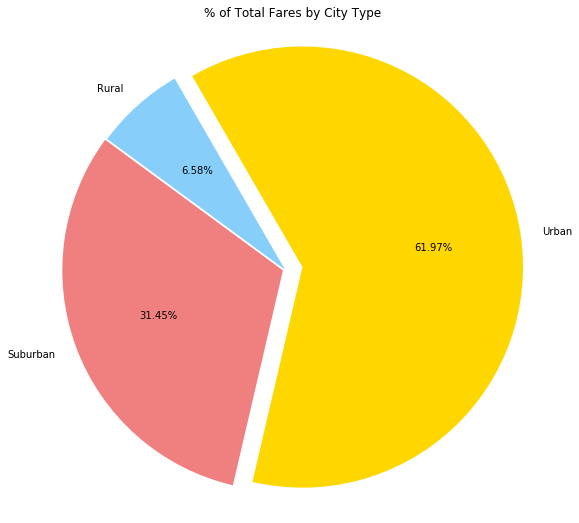

In [220]:
# The colors of each section of the pie chart
colors = ["lightskyblue","lightcoral", "gold"]


plt.pie(
    total_fare["fare"], labels=total_fare.index, colors=colors, explode = (0,0.01,0.08), startangle= 120, autopct="%1.2f%%"
        )

plt.axis('equal')
plt.title("% of Total Fares by City Type")

#plt.tight_layout()
plt.savefig("FaresbyCityType.png")
plt.show()

In [214]:
rides_by_citytype = merged_df["ride_id"].count()

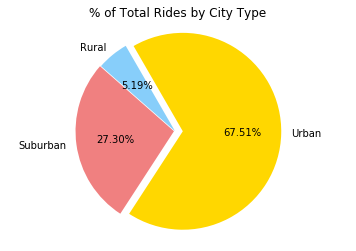

In [215]:
#% of Total Rides by City Type
colors = ["lightskyblue","lightcoral", "gold"]

plt.pie(
    rides_by_citytype, labels=total_fare.index, colors=colors, explode = (0,0.01,0.08), startangle= 120, autopct="%1.2f%%"
        )

plt.axis('equal')
plt.title("% of Total Rides by City Type")

#plt.tight_layout()
plt.savefig("RidesbyCityType.png")
plt.show()

In [216]:
drivers_by_citytype = merged_df["driver_count"].sum()

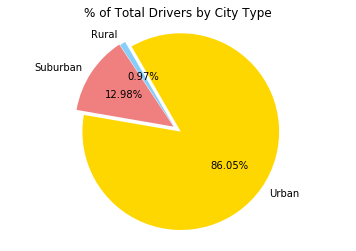

In [217]:
#% of Total Rides by City Type
colors = ["lightskyblue","lightcoral", "gold"]
plt.pie(
    drivers_by_citytype, labels=total_fare.index, colors=colors, explode = (0,0.01,0.08), startangle= 120, 
    autopct="%1.2f%%"
        )
plt.axis('equal')
plt.title("% of Total Drivers by City Type")

#plt.tight_layout()
plt.savefig("DriversbyCityType.png")
plt.show()

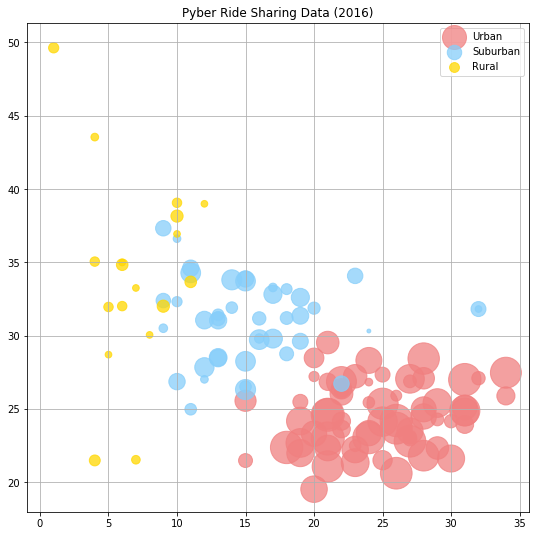

In [235]:
plt.figure(figsize=(9,9))

plt.scatter(bubble["Total Rides per City"][bubble["type"]=="Urban"],
            bubble["Average Fare per City"][bubble["type"]=="Urban"],
            c = "lightcoral",
            alpha = .75,
            s = bubble['driver_count'][bubble["type"]=="Urban"]*15,
            label = "Urban")

plt.scatter(bubble["Total Rides per City"][bubble['type']=="Suburban"],
            bubble["Average Fare per City"][bubble['type']=="Suburban"],
            c = "lightskyblue",
            alpha = .75,
            s = bubble['driver_count'][bubble["type"]=="Suburban"]*15,
            label = "Suburban")

plt.scatter(bubble["Total Rides per City"][bubble['type']=="Rural"],
            bubble["Average Fare per City"][bubble['type']=="Rural"],
            c = "gold",
            alpha = .75,
            s = bubble['driver_count'][bubble["type"]=="Rural"]*15,
            label = "Rural")

plt.title('Pyber Ride Sharing Data (2016)')

#plt.ylabel('Average Fare per City')

#plt.xlabel('Total Rides per City')

plt.grid(True)
plt.legend(loc='upper right')
plt.show()